In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('train.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,52,services,married,secondary,no,108,yes,no,unknown,15,may,543,12,-1,0,unknown,no
1,35,admin.,married,unknown,no,1055,no,no,cellular,2,mar,59,2,-1,0,unknown,no
2,37,blue-collar,married,secondary,no,32,yes,no,unknown,20,may,146,2,-1,0,unknown,no
3,57,unemployed,married,primary,no,2743,no,no,cellular,29,jan,89,1,-1,0,unknown,no
4,42,self-employed,married,tertiary,no,6383,no,no,cellular,27,aug,111,5,-1,0,unknown,no


In [4]:
df['y'].value_counts()

no     35952
yes     4737
Name: y, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f3ec828>,
      dtype=object)

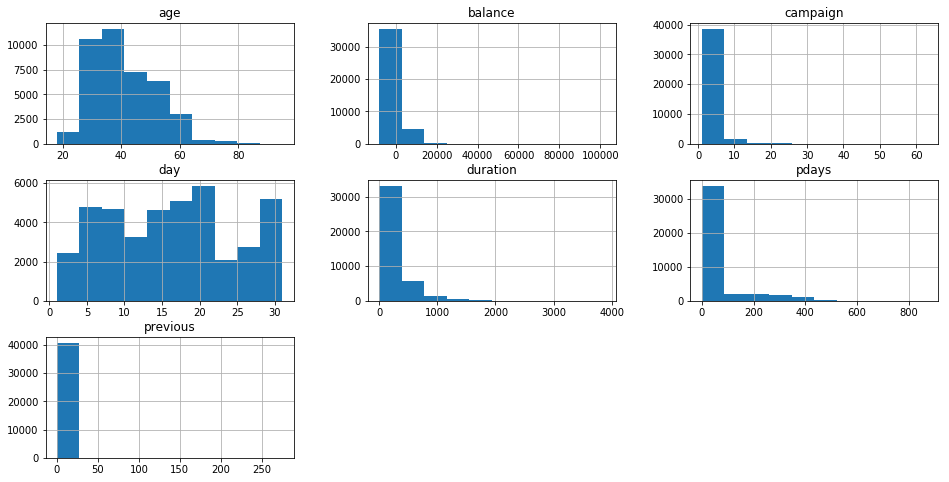

In [5]:
df.hist(figsize=(16,8))

In [6]:
# カテゴリ系の特徴量に含まれる値を確認
for col in df.columns:
    if not isinstance(df[col][0],str):
        continue
    print('({})'.format(col))
    print('{}'.format(np.unique(df[col].values)))

(job)
['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'unknown']
(marital)
['divorced' 'married' 'single']
(education)
['primary' 'secondary' 'tertiary' 'unknown']
(default)
['no' 'yes']
(housing)
['no' 'yes']
(loan)
['no' 'yes']
(contact)
['cellular' 'telephone' 'unknown']
(month)
['apr' 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']
(poutcome)
['failure' 'other' 'success' 'unknown']
(y)
['no' 'yes']


In [56]:
def create_feature_df(input_df):
    # 各特徴量の相関係数を可視化
    features_df = pd.DataFrame()

    # 目的変数
    features_df['y'] = input_df['y'].apply(lambda s : 1 if s == 'yes' else 0)

    # 連続値
    features_df['age'] = input_df['age']
    features_df['balance'] = input_df['balance']
    features_df['day'] = input_df['day']
    features_df['duration'] = input_df['duration']
    features_df['campaign'] = input_df['campaign']
    features_df['pdays'] = input_df['pdays']
    features_df['previous'] = input_df['previous']

    # ２値
    features_df['default'] = input_df['default'].apply(lambda s : 1 if s=='yes' else 0)
    features_df['housing'] = input_df['housing'].apply(lambda s : 1 if s=='yes' else 0)
    features_df['loan'] = input_df['loan'].apply(lambda s : 1 if s=='yes' else 0)

    # カテゴリ
    features_df['job'],_ = pd.factorize(input_df['job'])
    features_df['marital'],_ = pd.factorize(input_df['marital'])
    features_df['education'],_ = pd.factorize(input_df['education'])
    features_df['contact'],_ = pd.factorize(input_df['contact'])
    features_df['month'],_ = pd.factorize(input_df['month'])
    features_df['poutcome'],_ = pd.factorize(input_df['poutcome'])
    
    return features_df

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13229e208>,
      dtype=object)

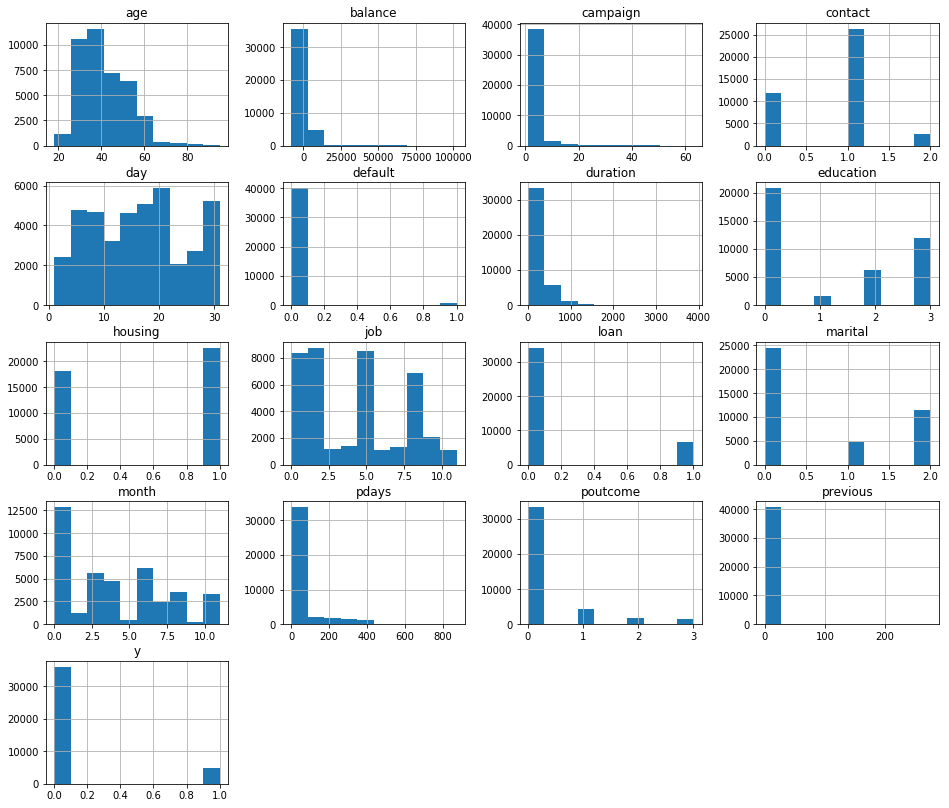

In [57]:
features_df = create_feature_df(df)
features_df.hist(figsize=(16,14))

[0.99186644 0.00704772]
0.9989141591734613


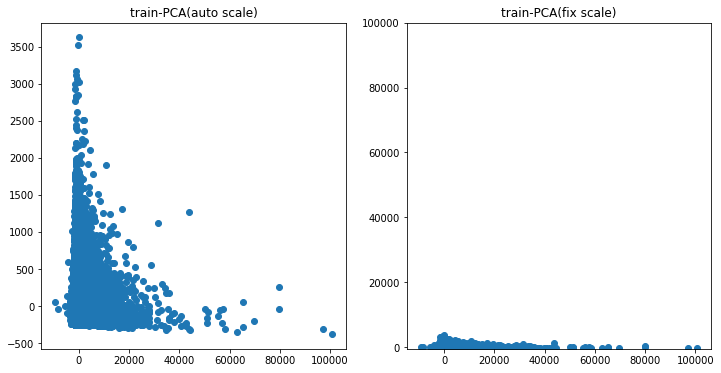

In [60]:
# 外れ値がないかどうか調べる
# PCA
from sklearn.decomposition import PCA

train_df = features_df.drop('y',axis=1)
pca = PCA(n_components=2)
pca.fit(train_df)
transformed = pca.fit_transform(train_df)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,2,1)
ax.set_title('train-PCA(auto scale)')
ax.scatter(transformed[:,0],transformed[:,1])
ax = fig.add_subplot(1,2,2)
ax.set_title('train-PCA(fix scale)')
ax.set_ylim(-500,100000)
ax.scatter(transformed[:,0],transformed[:,1])
#plt.axes().set_aspect('equal', 'datalim')

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

In [55]:
# 外れ値を除外したDataFrameを作成して保存する
outliers_id = []
threshold = 50000
dropped_filename = 'dropped_outliers_train.csv'
for i,trans in enumerate(transformed):
    if trans[0] > threshold:
        #print(i)
        #print(train_df.loc[i])
        outliers_id.append(i)
dropped_train_df = df.drop(outliers_id)
dropped_train_df.to_csv(dropped_filename)
dropped_train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,52,services,married,secondary,no,108,yes,no,unknown,15,may,543,12,-1,0,unknown,no
1,35,admin.,married,unknown,no,1055,no,no,cellular,2,mar,59,2,-1,0,unknown,no
2,37,blue-collar,married,secondary,no,32,yes,no,unknown,20,may,146,2,-1,0,unknown,no
3,57,unemployed,married,primary,no,2743,no,no,cellular,29,jan,89,1,-1,0,unknown,no
4,42,self-employed,married,tertiary,no,6383,no,no,cellular,27,aug,111,5,-1,0,unknown,no


[0.99186643 0.00704772]
0.9989141499546597


array([[ 5.77139755e-06,  3.47195708e-04,  9.99997788e-01,
         9.49149471e-06,  2.06927281e-03, -1.13264200e-05,
         9.43035810e-05,  1.31457709e-05, -2.87313908e-06,
        -1.12435405e-05, -1.00692261e-05,  5.85697508e-05,
        -6.44246555e-06,  3.38567979e-05,  8.38171283e-06,
         8.90658614e-05,  8.34531111e-06],
       [ 4.92096983e-04, -3.37089184e-04, -2.06916348e-03,
        -1.06139327e-03,  9.99996524e-01, -1.01021872e-03,
        -2.24214776e-04,  3.66887144e-05, -5.13333446e-06,
         1.31706822e-05, -1.06661316e-05, -1.47201517e-05,
         7.95792272e-05, -2.87871064e-05, -1.27675909e-06,
         3.21039168e-04,  6.78108721e-05]])

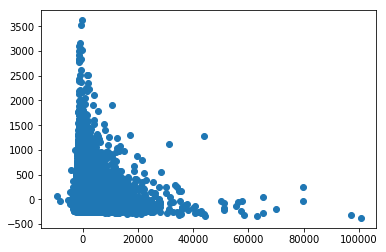

In [53]:
# 目的変数も入れてみる
# 外れ値がないかどうか調べる
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(features_df)
transformed = pca.fit_transform(features_df)

plt.scatter(transformed[:,0],transformed[:,1])
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))
pca.components_

[0.99131022 0.00749919]
0.9988094121361364


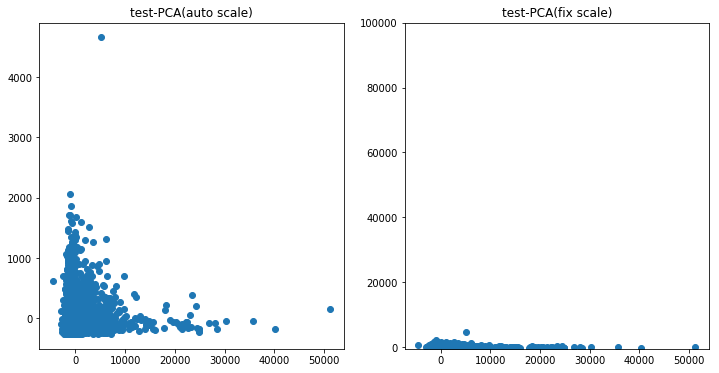

In [61]:
# テストデータも調べる
test_df = pd.read_csv('test.csv')
test_features_df = create_feature_df(test_df)

# 外れ値がないかどうか調べる
# PCA
from sklearn.decomposition import PCA

t_df = test_features_df.drop('y',axis=1)
pca = PCA(n_components=2)
pca.fit(t_df)
transformed = pca.fit_transform(t_df)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(1,2,1)
ax.set_title('test-PCA(auto scale)')
ax.scatter(transformed[:,0],transformed[:,1])
ax = fig.add_subplot(1,2,2)
ax.set_title('test-PCA(fix scale)')
ax.set_ylim(-500,100000)
ax.scatter(transformed[:,0],transformed[:,1])
#plt.axes().set_aspect('equal', 'datalim')

print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

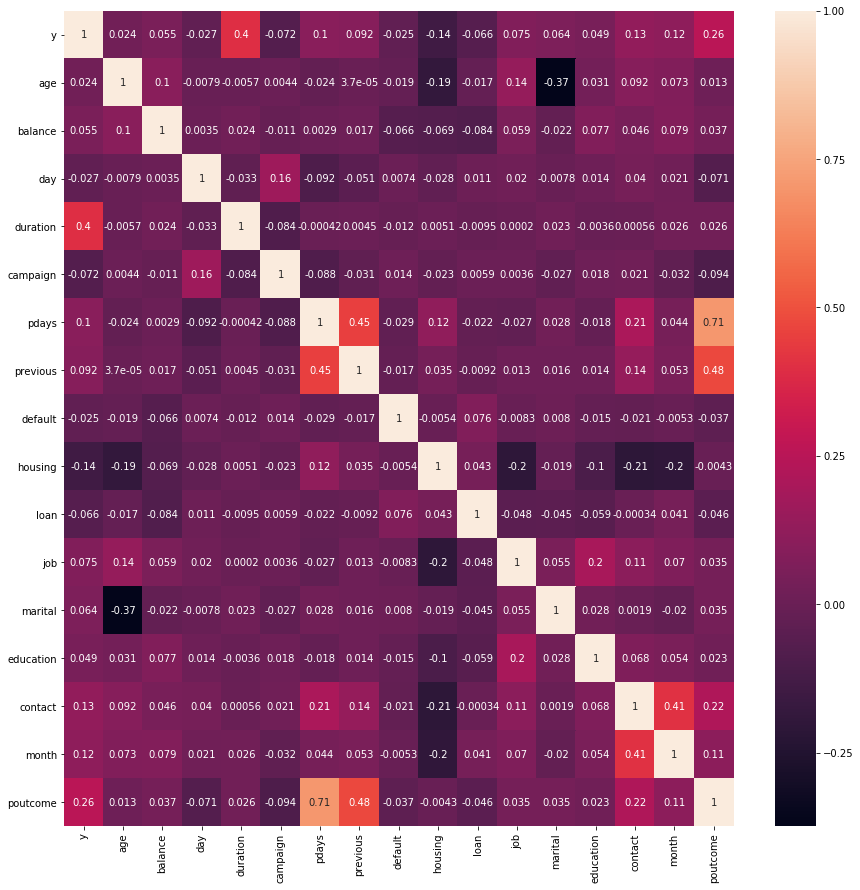

In [62]:
# 各変数同士の相関係数を確認する
import seaborn 
plt.figure(figsize=(15,15))
seaborn.heatmap(create_feature_df(df).corr(), annot=True)

# 参考URL：https://kopaprin.hatenadiary.jp/entry/2018/04/19/235800

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40689 entries, 0 to 40688
Data columns (total 17 columns):
age          40689 non-null int64
job          40689 non-null object
marital      40689 non-null object
education    40689 non-null object
default      40689 non-null object
balance      40689 non-null int64
housing      40689 non-null object
loan         40689 non-null object
contact      40689 non-null object
day          40689 non-null int64
month        40689 non-null object
duration     40689 non-null int64
campaign     40689 non-null int64
pdays        40689 non-null int64
previous     40689 non-null int64
poutcome     40689 non-null object
y            40689 non-null object
dtypes: int64(7), object(10)
memory usage: 5.3+ MB


In [64]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,40689.000000,40689.000000,40689.000000,40689.000000,40689.000000,40689.000000,40689.000000
mean,40.952936,1357.376048,15.817395,257.894148,2.759493,39.961243,0.581902
std,10.619194,3049.688934,8.327471,257.148188,3.102341,99.807292,2.354346
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,71.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,446.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1419.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,3881.000000,63.000000,871.000000,275.000000


In [65]:
df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,40689,40689,40689,40689,40689,40689,40689,40689,40689,40689
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,8767,24497,20848,39961,22611,34157,26330,12427,33288,35952


In [66]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,40689.000000,40689,40689,40689,40689,40689.000000,40689,40689,40689,40689.000000,40689,40689.000000,40689.000000,40689.000000,40689.000000,40689,40689
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,8767,24497,20848,39961,NaN,22611,34157,26330,NaN,12427,NaN,NaN,NaN,NaN,33288,35952
mean,40.952936,NaN,NaN,NaN,NaN,1357.376048,NaN,NaN,NaN,15.817395,NaN,257.894148,2.759493,39.961243,0.581902,NaN,NaN
std,10.619194,NaN,NaN,NaN,NaN,3049.688934,NaN,NaN,NaN,8.327471,NaN,257.148188,3.102341,99.807292,2.354346,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,71.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,446.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1419.000000,NaN,NaN,NaN,21.000000,NaN,318.000000,3.000000,-1.000000,0.000000,NaN,NaN


/Users/takeshi/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


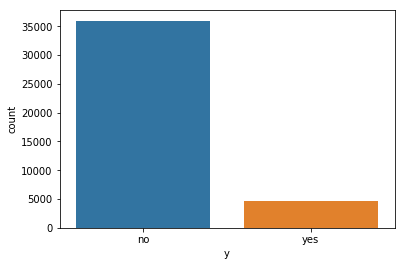

In [68]:
seaborn.countplot(x='y', data=df)

/Users/takeshi/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


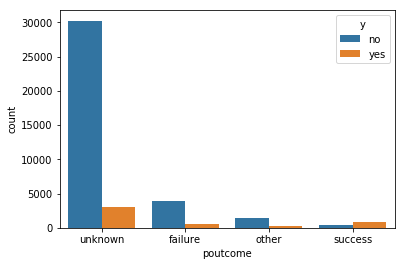

In [70]:
seaborn.countplot(x='poutcome', hue='y', data=df)